In [30]:
# Brasília - Logit

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
#sns.set(style="white") #white background style for seaborn plots
#sns.set(style="whitegrid", color_codes=True)

from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 6,4
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (6,4)})


In [3]:
df = pd.read_excel(r"Brasilia_ML_Std.xls")
df.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_DF
0,-0.717529,-0.626223,-0.666778,-0.196953,-0.477565,1
1,-0.838328,-0.807425,-0.792635,0.885682,-0.286445,1
2,-0.516970,-0.574450,-0.631149,-1.795652,1.239965,1
3,-0.777291,-0.761828,-0.761104,-1.063986,0.201244,1
4,-0.716441,-0.647552,-0.681930,-0.602536,-0.301323,1


In [4]:
# Predicting Cartel
# define X and y
X = df.drop("Cartel_DF",axis = 1)
y = df.Cartel_DF

In [5]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [6]:
# train a logit model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=15000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=15000, penalty='none', solver='saga')

In [7]:
print(logreg.coef_, logreg.intercept_)

[[ 9.11052557e+00  4.32475426e+01 -7.03027751e+01  6.01688100e-02
  -4.09599158e-01]] [-8.14108273]


In [8]:
# make class predictions for the testing set
y_pred = logreg.predict(X_test)

In [9]:
## Null accuracy: accuracy that could be achieved by always predicting the most frequent class

y_test.value_counts()

1    93
0    54
Name: Cartel_DF, dtype: int64

In [10]:
#calculate the percentage of ones
Percentage_of_ones = y_test.mean()
print('Null Accuracy:', Percentage_of_ones)

Null Accuracy: 0.6326530612244898


In [11]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
#mean_squared_error(y_test, y_pred_class)

0.9863945578231292


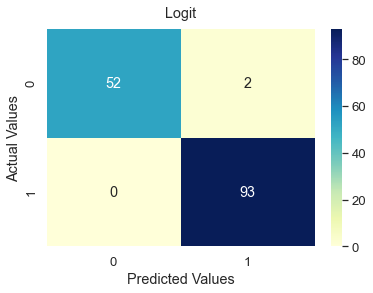

In [12]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.2) # Adjust to fit
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Logit', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_Logistic_Brasilia.png', dpi=600)
plt.show()

In [13]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        93

    accuracy                           0.99       147
   macro avg       0.99      0.98      0.99       147
weighted avg       0.99      0.99      0.99       147



In [14]:
# store the predicted probabilities for class 1
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

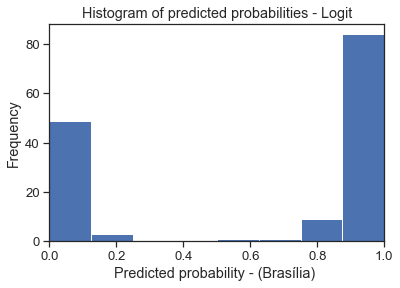

In [29]:
# histogram of predicted probabilities
plt.hist(y_pred_proba, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities - Logit')
plt.xlabel('Predicted probability - (Brasília) ')
plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('Histogram_Logistic_Brasilia.png', dpi=600)
plt.show()

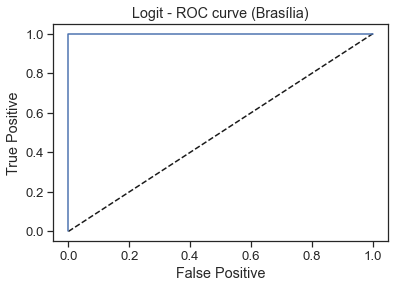

In [28]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Logit - ROC curve (Brasília)')
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_Logistic_Brasilia.png', dpi=600)
plt.show()

In [17]:
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [18]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
auc = cross_val_score(logreg, X_test, y_test, cv=5, scoring='roc_auc').mean()
print('AUC:',auc)

AUC: 0.9904306220095694


In [19]:
import eli5
from eli5.sklearn import PermutationImportance

In [20]:
perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.5905 ± 0.0560,Price_sd
0.1075 ± 0.0467,CV
0.0327 ± 0.0369,SPD
0.0000 ± 0.0122,Price_kurtosis
0 ± 0.0000,Price_skewness


In [21]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tpr[thresholds > threshold][-1])
    print('specificity:', 1 - fpr[thresholds > threshold][-1])

In [22]:
evaluate_threshold(0.5)

sensitivity: 1.0
specificity: 1.0


In [23]:
evaluate_threshold(0.6)

sensitivity: 1.0
specificity: 1.0


In [24]:
evaluate_threshold(0.7)

sensitivity: 1.0
specificity: 1.0


In [25]:
evaluate_threshold(0.8)

sensitivity: 0.7956989247311828
specificity: 1.0


In [26]:
evaluate_threshold(0.9)

sensitivity: 0.7956989247311828
specificity: 1.0


In [27]:
evaluate_threshold(0.99)

sensitivity: 0.010752688172043012
specificity: 1.0
